In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

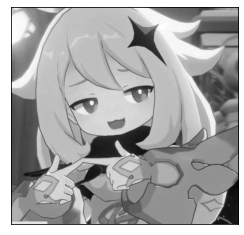

In [25]:
img = cv2.imread('data/paimeng.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height = img.shape[0]
width = img.shape[1]

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
# plt.imshow(img, "brg")
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

## 分水岭

In [26]:
def Watershed(grayImage):
    # 大津法进行阈值分割
    ret, thresh = cv2.threshold(
        grayImage, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    k = np.ones((5, 5), dtype=np.uint8)
    # 开运算
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, k, iterations=2)
    # 通过距离变换算法得到前景区域
    distTransform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, fore = cv2.threshold(distTransform, 0.2 * distTransform.max(), 255, 0)
    # 开运算结果膨胀
    bg = cv2.dilate(opening, k, iterations=3)
    fore = np.uint8(fore)
    # 得到同时又背景和前景的区域
    unknown = cv2.subtract(bg, fore)
    # 连通区域处理
    ret, markets = cv2.connectedComponents(fore)
    markets = markets + 1
    markets[unknown == 255] = 0
    # 分水岭算法
    markets = cv2.watershed(img, markets)
    result = img.copy()
    result[markets == -1] = [0,0,0]
    return thresh, opening, distTransform, fore, unknown, markets, result

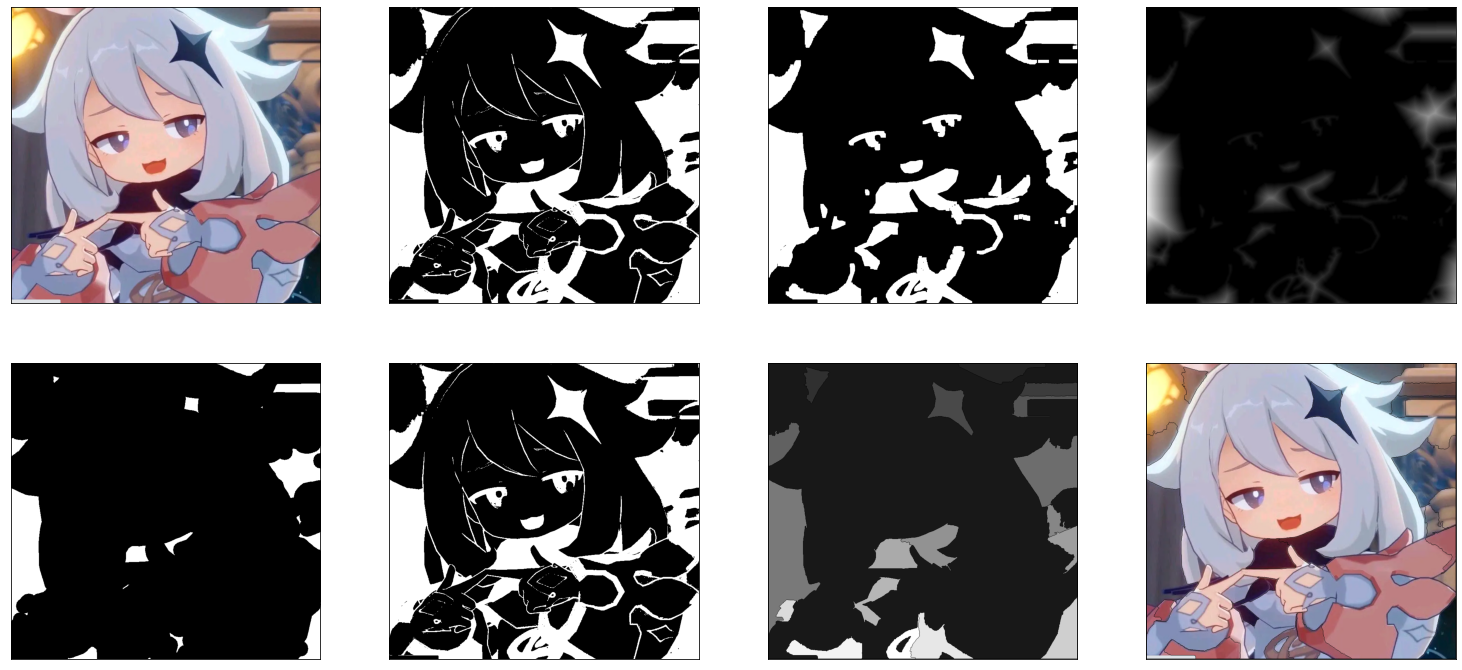

In [27]:
thresh, opening, distTransform, fore, unknown, markets, result = Watershed(gray)
plt.figure(figsize=(26,12))
plt.subplot(241)
plt.imshow(img, "brg")
plt.xticks([]), plt.yticks([])

plt.subplot(242)
plt.imshow(thresh, "gray")
plt.xticks([]), plt.yticks([])

plt.subplot(243)
plt.imshow(opening, "gray")
plt.xticks([]), plt.yticks([])

plt.subplot(244)
plt.imshow(distTransform, "gray")
plt.xticks([]), plt.yticks([])

plt.subplot(245)
plt.imshow(fore, "gray")
plt.xticks([]), plt.yticks([])

plt.subplot(246)
plt.imshow(thresh, "gray")
plt.xticks([]), plt.yticks([])

plt.subplot(247)
plt.imshow(markets, "gray")
plt.xticks([]), plt.yticks([])

plt.subplot(248)
plt.imshow(result, "brg")
plt.xticks([]), plt.yticks([])
plt.show()